In [ ]:
!pip install nbformat

In [ ]:
%run Project_3_Step_3_1_ML_Sampling.ipynb

In [50]:
from sklearn import tree

* Overview of variables

Dataset after Null Value is done: data

Dataset after resample is done:  x_resampled, y_resampled

Train Dataset:  x_train, y_train 
                   
Test Dataset:  x_test , y_test

* Feature Scaling using Min-Max Scaling

In [51]:
cols = x_train.columns

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(x_train)

X_test = scaler.transform(x_test)

Convert numpy array to dataframe

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [54]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.811321,0.750958,0.000000,0.189320,0.000000,0.395349,0.126437,0.126437,0.17,0.13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.608491,0.545977,0.000000,0.048544,0.758621,0.209302,0.103448,0.218391,0.68,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.518868,0.559387,0.000000,0.048544,0.758621,0.426357,0.252874,0.448276,0.42,0.41,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.549528,0.567050,0.000000,0.094660,0.758621,0.240310,0.000000,0.275862,0.69,0.49,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.658019,0.846743,0.000000,0.184466,0.786207,0.356589,0.080460,0.149425,0.33,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121365,0.379717,0.386973,0.007547,0.067961,0.731034,0.341085,0.229885,0.321839,0.68,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121366,0.514151,0.375479,0.107278,0.087379,0.627586,0.372093,0.344828,0.275862,0.62,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
121367,0.523585,0.526820,0.009704,0.070388,0.227586,0.612403,0.068966,0.068966,0.82,0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121368,0.530660,0.593870,0.009704,0.053398,0.668966,0.255814,0.045977,0.195402,0.80,0.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


* Import Module for Training

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report   

import time
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_

        # 確保 features 是一維純文字索引
        features = pd.Index(X_train.columns).astype(str)

        # 建立資料表
        importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        importances_df = importances_df.sort_values(by='Importance', ascending=False)
        print(importances_df)
        # 畫圖
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importances_df.head(20))
        plt.title('Top 20 Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
        


    return model, accuracy, roc_auc, coh_kap, time_taken

In [60]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Init Score Set

In [61]:
model_name = []
accuracy_scores = []
roc_auc_scores = []
coh_kap_scores = []
tt = []

## Model-1: Logistic Regression penalized by Lasso

Accuracy = 0.8820620687110226
ROC Area under Curve = 0.8226286755973587
Cohen's Kappa = 0.654825789386239
Time taken = 60.84644412994385
              precision    recall  f1-score   support

         0.0    0.91915   0.92998   0.92453     21051
         1.0    0.74586   0.71528   0.73025      6048

    accuracy                        0.88206     27099
   macro avg    0.83251   0.82263   0.82739     27099
weighted avg    0.88048   0.88206   0.88117     27099



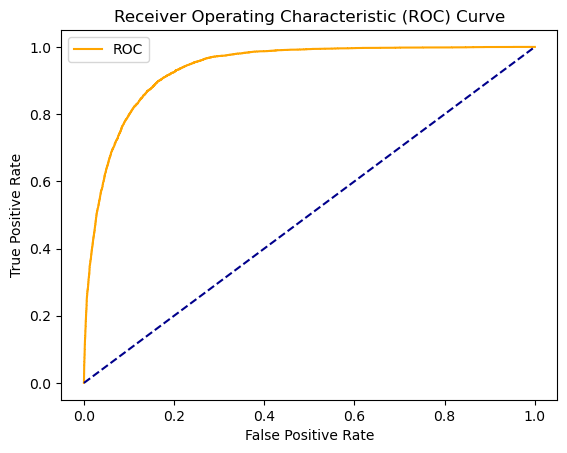

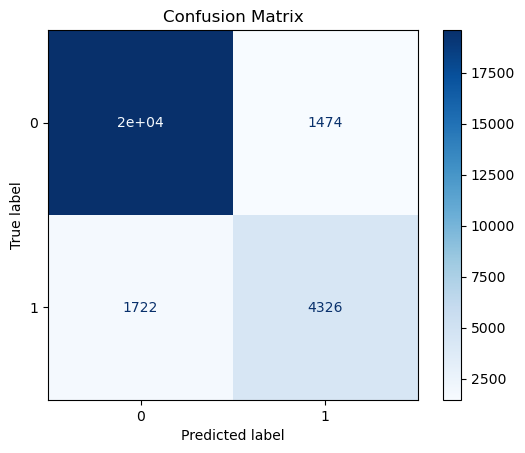

In [62]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, 
                                                                columnsWithoutList(X_train,col_set_feature_engineering), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_feature_engineering), 
                                                                y_test)
model_name.append('Logistic Regression')
accuracy_scores.append(accuracy_lr)
roc_auc_scores.append(roc_auc_lr)
coh_kap_scores.append(coh_kap_lr)
tt.append(tt_lr)

## Model-2: K-nearest neighbors (KNN)

Accuracy = 0.8300675301671648
ROC Area under Curve = 0.7089131327320725
Cohen's Kappa = 0.460207786632184
Time taken = 5.222109079360962
              precision    recall  f1-score   support

         0.0    0.86362   0.92775   0.89454     21051
         1.0    0.66087   0.49008   0.56280      6048

    accuracy                        0.83007     27099
   macro avg    0.76225   0.70891   0.72867     27099
weighted avg    0.81837   0.83007   0.82050     27099



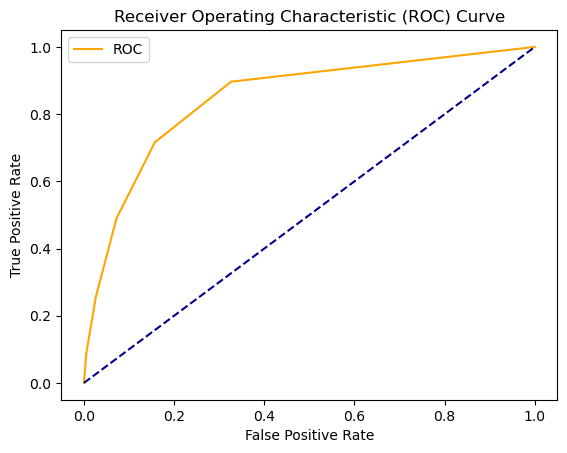

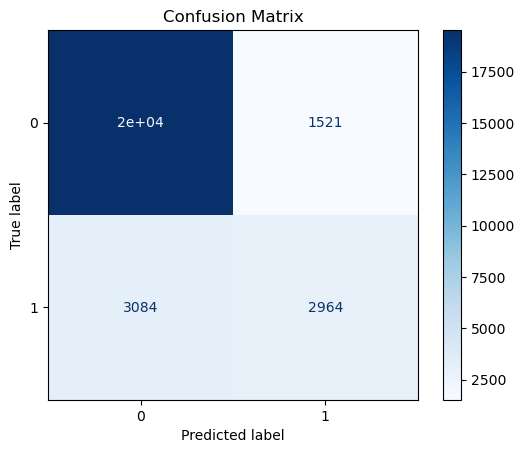

In [63]:
params_knn = {'n_neighbors': 5}

model_knn = KNeighborsClassifier(**params_knn)
model_knn, accuracy_knn, roc_auc_knn, coh_kap_knn, tt_knn = run_model(model_knn, 
                                                                columnsWithoutList(X_train,col_set_dummies), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_dummies), 
                                                                y_test)
model_name.append('KNN')
accuracy_scores.append(accuracy_knn)
roc_auc_scores.append(roc_auc_knn)
coh_kap_scores.append(coh_kap_knn)
tt.append(tt_knn)

## Model-3: Decision Tree

Accuracy = 0.8476696557068526
ROC Area under Curve = 0.7936572264410017
Cohen's Kappa = 0.5720789086893395
Time taken = 0.41759777069091797
              precision    recall  f1-score   support

         0.0    0.91077   0.89122   0.90089     21051
         1.0    0.64769   0.69610   0.67102      6048

    accuracy                        0.84767     27099
   macro avg    0.77923   0.79366   0.78596     27099
weighted avg    0.85206   0.84767   0.84959     27099



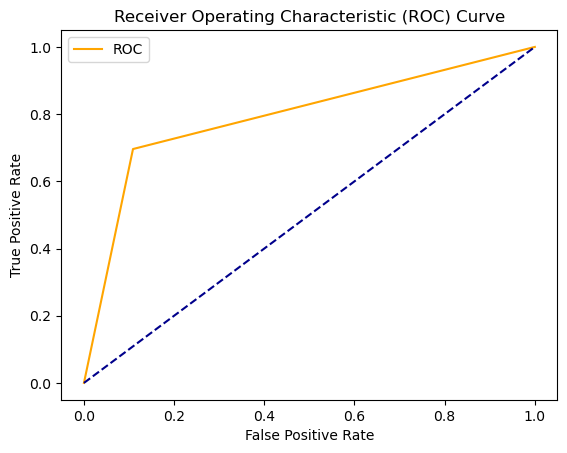

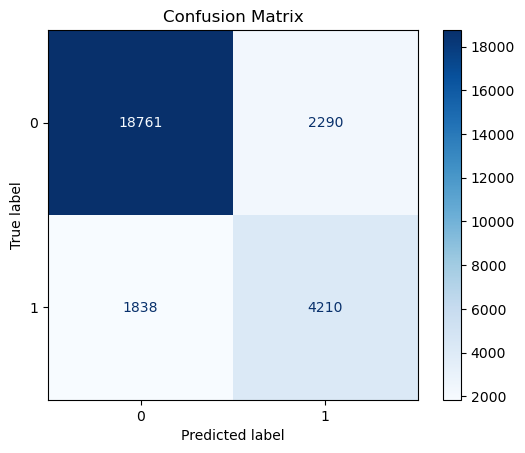

                     Feature  Importance
9           ('Humidity3pm',)    0.101472
11          ('Pressure3pm',)    0.092567
4              ('Sunshine',)    0.091970
8           ('Humidity9am',)    0.069915
13             ('Cloud3pm',)    0.066440
..                       ...         ...
37   ('Location_GoldCoast',)    0.000147
48        ('Location_Nhil',)    0.000123
64       ('Location_Uluru',)    0.000111
39   ('Location_Katherine',)    0.000092
59  ('Location_SalmonGums',)    0.000052

[120 rows x 2 columns]


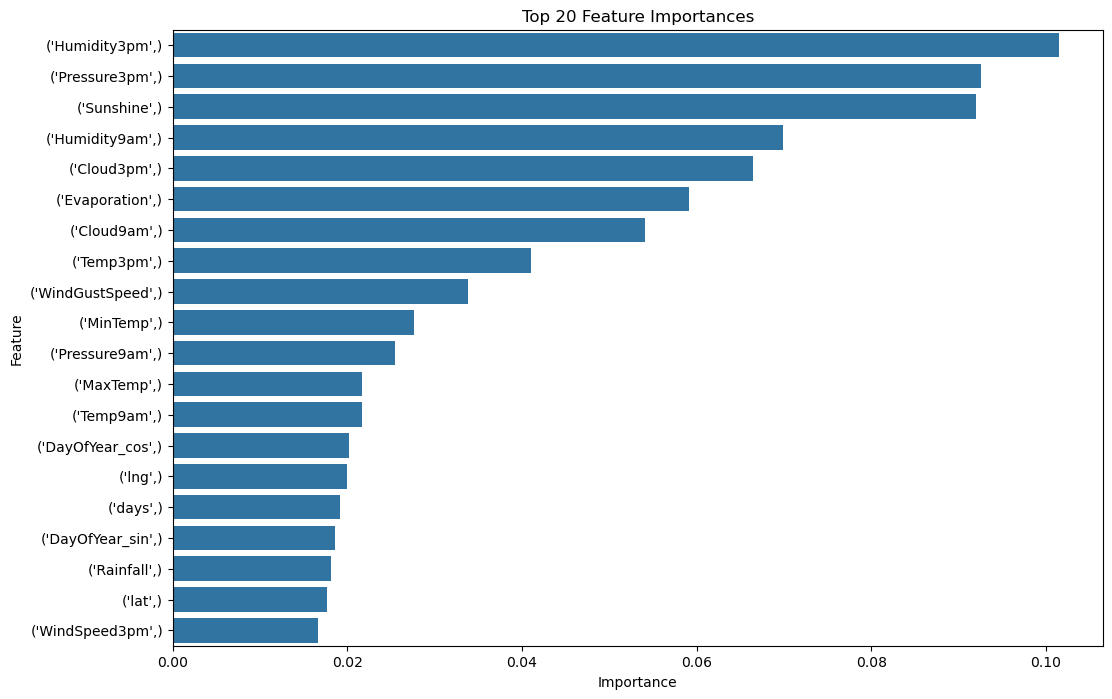

In [64]:
params_dt = {
    # 'max_depth': 16,
    'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, 
                                                                columnsWithoutList(X_train,col_set_dummies), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_dummies), 
                                                                y_test)
model_name.append('Decision Tree')
accuracy_scores.append(accuracy_dt)
roc_auc_scores.append(roc_auc_dt)
coh_kap_scores.append(coh_kap_dt)
tt.append(tt_dt)

In [65]:
# # Custom color function applied to nodes
# plt.figure(figsize=(500, 100))  # Adjust the figure size as needed
# tree.plot_tree(model_dt, 
#                feature_names=columnsWithoutList(X_train,col_set_dummies).columns, 
#             #    class_names=class_names,
#                filled=True)

In [66]:
model_dt.tree_

In [67]:
from xml.etree.ElementTree import Element, SubElement, tostring
from xml.dom.minidom import parseString

In [68]:
# XML 轉換遞迴函數
def tree_to_xml(tree, feature_names, node_id=0):
    node = Element("Node", id=str(node_id))
    
    if tree.feature[node_id] != -2:
        # 中間節點
        feature = feature_names[tree.feature[node_id]]
        threshold = tree.threshold[node_id]
        node.set("feature", feature)
        node.set("threshold", str(threshold))
        
        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]
        
        node.append(tree_to_xml(tree, feature_names, left_child))
        node.append(tree_to_xml(tree, feature_names, right_child))
    else:
        # 葉節點
        value = tree.value[node_id]
        node.set("value", str(value.tolist()))
        node.set("samples", str(tree.n_node_samples[node_id]))
    
    return node

# 建立 XML 結構
tree_xml = tree_to_xml(model_dt.tree_, columnsWithoutList(X_train,col_set_dummies).columns)
xml_str = tostring(tree_xml, 'utf-8')
pretty_xml = parseString(xml_str).toprettyxml(indent="  ")
# print(pretty_xml)


## Model-4: Random Forest

Accuracy = 0.930514041108528
ROC Area under Curve = 0.8760277265982161
Cohen's Kappa = 0.7895997647257469
Time taken = 18.09150719642639
              precision    recall  f1-score   support

         0.0    0.93847   0.97444   0.95612     21051
         1.0    0.89735   0.77761   0.83320      6048

    accuracy                        0.93051     27099
   macro avg    0.91791   0.87603   0.89466     27099
weighted avg    0.92929   0.93051   0.92868     27099



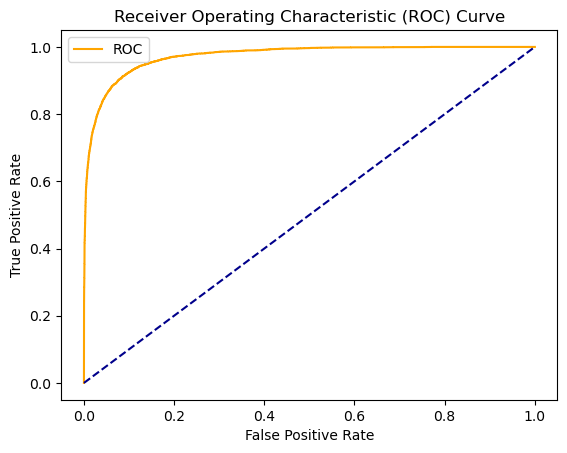

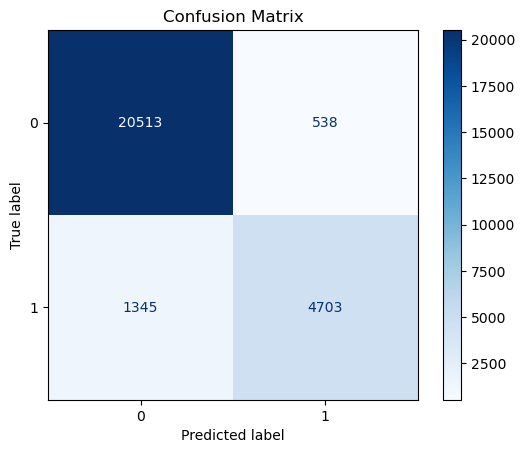

                        Feature  Importance
4                 ('Sunshine',)    0.162338
13                ('Cloud3pm',)    0.117982
9              ('Humidity3pm',)    0.112869
12                ('Cloud9am',)    0.079311
3              ('Evaporation',)    0.063153
..                          ...         ...
27  ('Location_BadgerysCreek',)    0.000341
26   ('Location_AliceSprings',)    0.000328
39      ('Location_Katherine',)    0.000158
48           ('Location_Nhil',)    0.000143
64          ('Location_Uluru',)    0.000106

[120 rows x 2 columns]


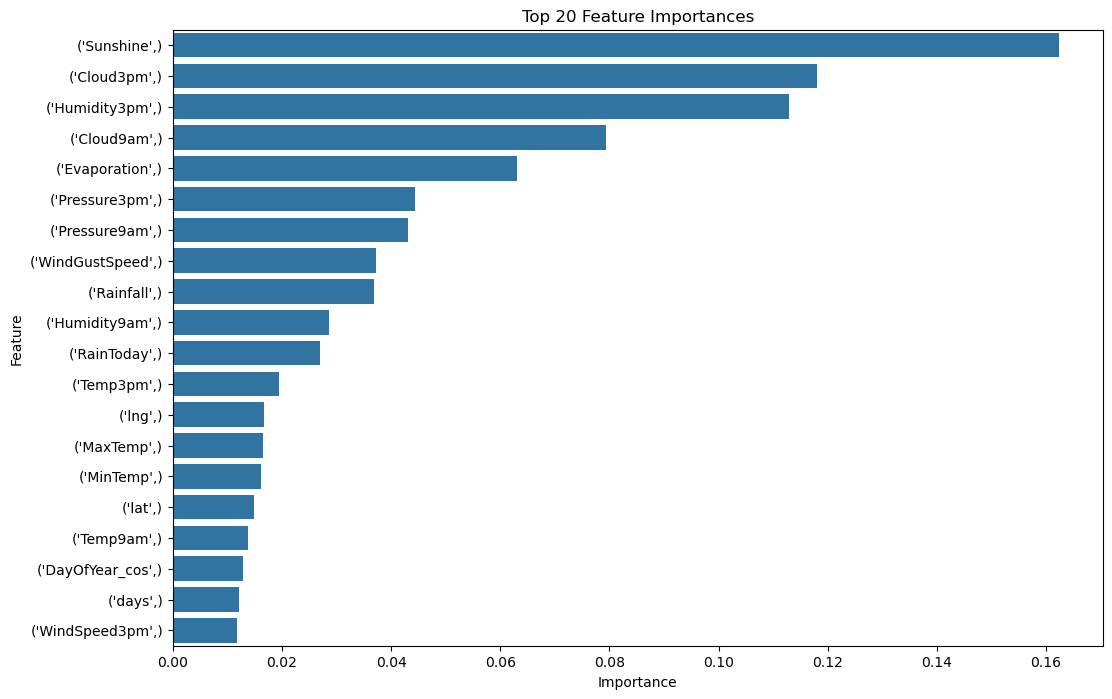

In [69]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf,
                                                                columnsWithoutList(X_train,col_set_dummies), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_dummies), 
                                                                y_test)
model_name.append('Random Forest')
accuracy_scores.append(accuracy_rf)
roc_auc_scores.append(roc_auc_rf)
coh_kap_scores.append(coh_kap_rf)
tt.append(tt_rf)

## Model Comparison

C:\Users\leung\AppData\Local\Temp\ipykernel_10496\3809377514.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data_scores, palette='summer')


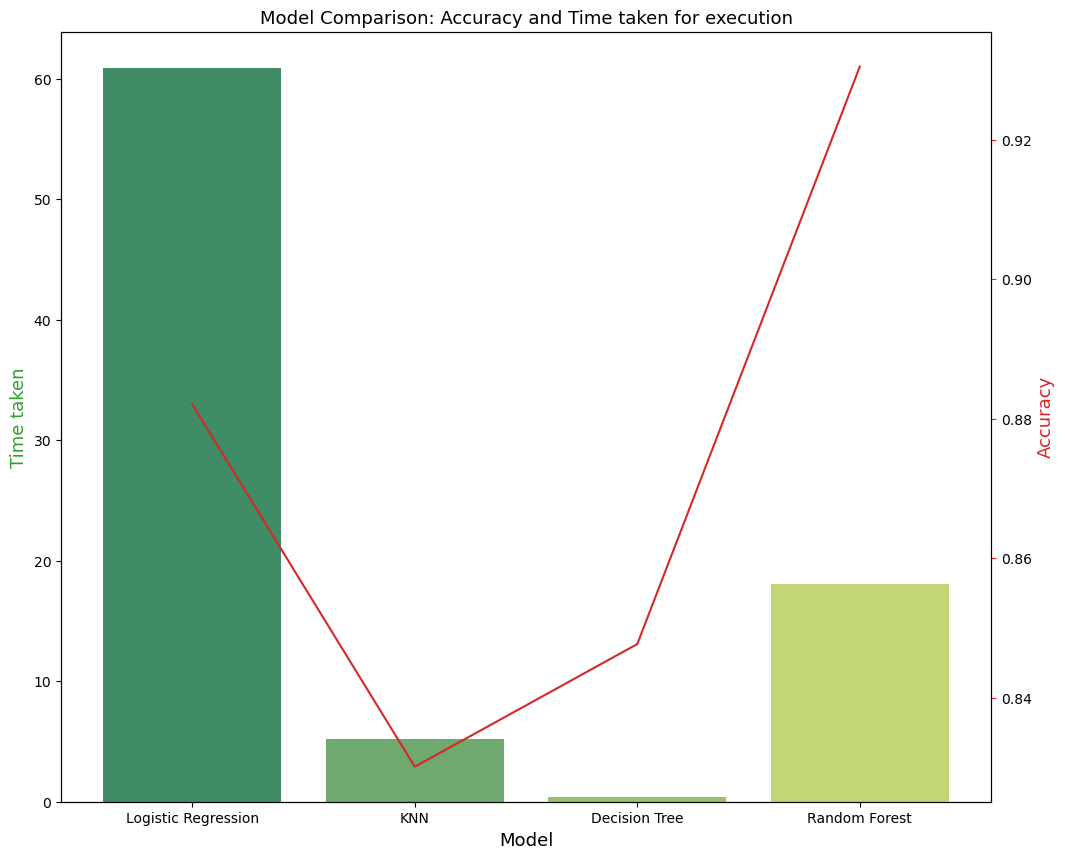

In [70]:

model_data = {'Model': model_name,
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data_scores = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data_scores, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data_scores, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

C:\Users\leung\AppData\Local\Temp\ipykernel_10496\3412350124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data_scores, palette='winter')


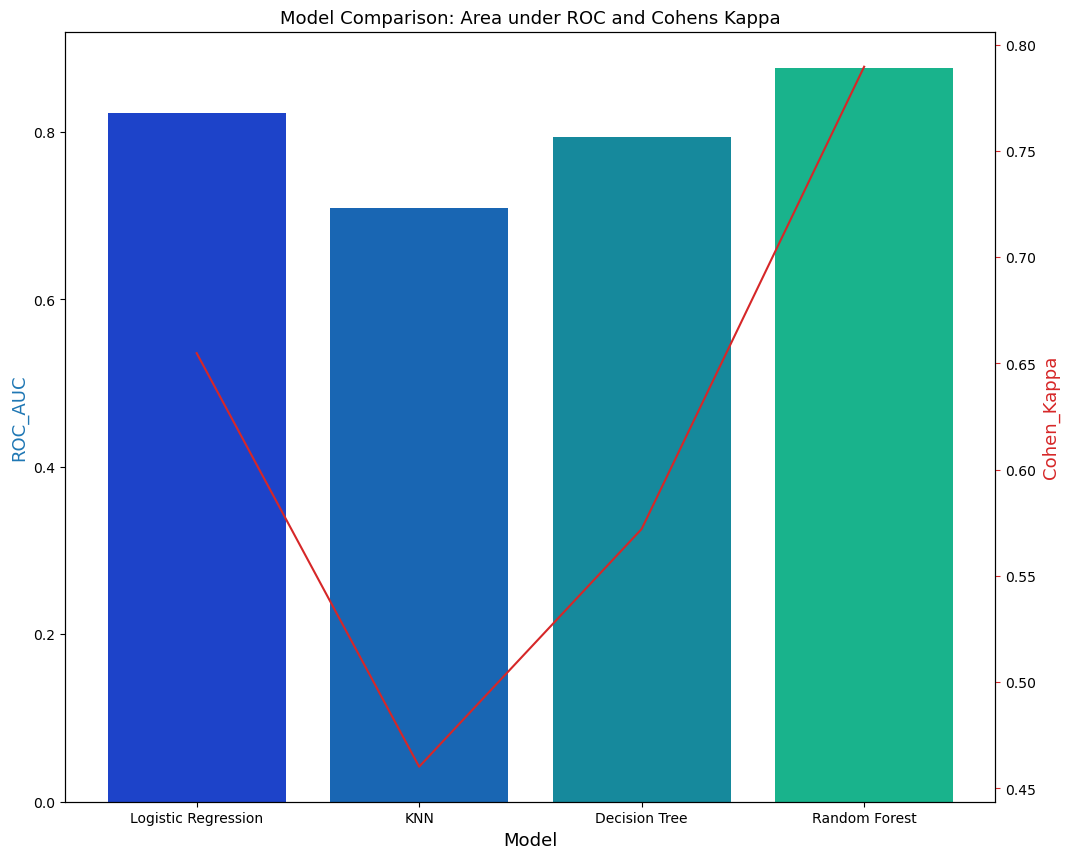

In [71]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data_scores, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data_scores, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [72]:
data_scores

,Model,Accuracy,ROC_AUC,Cohen_Kappa,Time taken
0,Logistic Regression,0.882062,0.822629,0.654826,60.846444
1,KNN,0.830068,0.708913,0.460208,5.222109
2,Decision Tree,0.847670,0.793657,0.572079,0.417598
3,Random Forest,0.930514,0.876028,0.789600,18.091507


## Below Codes are for Time Series Split and Grid Search  Cross Validation

Init Score Set

In [73]:
model_name_2 = []
accuracy_scores_2 = []
roc_auc_scores_2 = []
coh_kap_scores_2 = []
tt_2 = []

Import Module for TimeSeriesSplit and GridSearchCV

In [74]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [75]:
tscv = TimeSeriesSplit(n_splits=5)

Check

In [ ]:
X_train

In [ ]:
X_train.info()

In [ ]:
columnsWithoutList(X_train,col_set_feature_engineering)

In [ ]:
columnsWithoutList(X_train,col_set_feature_engineering).info()

## Model-1: Logistic Regression

In [80]:
model_lr2 = LogisticRegression()

param_grid_lr2 = {
    'solver': ['lbfgs', 'liblinear','newton-cg', 'newton-cholesky','‘sag', 'saga'],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
}

grid_serach_lr2 = GridSearchCV(estimator=model_lr2, 
                                 param_grid=param_grid_lr2, 
                                 cv=tscv, 
                                 scoring='accuracy', 
                                 )
grid_serach_lr2.fit(X_train, y_train)
best_params_lr2 = grid_serach_lr2.best_params_
print("Best parameters for Logistic Regression: ", best_params_lr2)

c:\Users\leung\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\leung\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:497: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra messag

Best parameters for Logistic Regression:  {'penalty': 'l2', 'solver': 'newton-cg'}


Accuracy = 0.8821358721724049
ROC Area under Curve = 0.8225583390450857
Cohen's Kappa = 0.6549179906108287
Time taken = 1.5566654205322266
              precision    recall  f1-score   support

         0.0    0.91908   0.93017   0.92459     21051
         1.0    0.74629   0.71495   0.73028      6048

    accuracy                        0.88214     27099
   macro avg    0.83268   0.82256   0.82744     27099
weighted avg    0.88052   0.88214   0.88123     27099



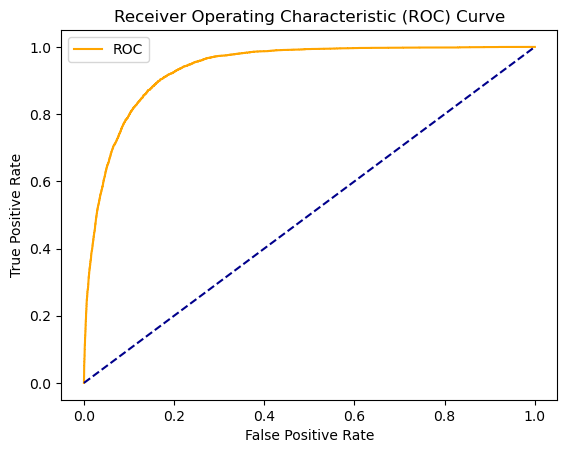

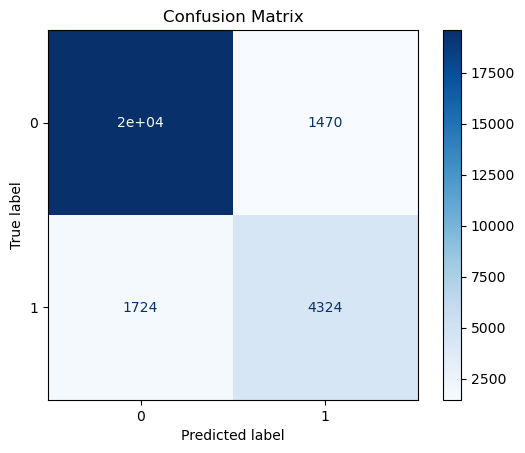

In [81]:
params_lr2 = {'penalty': 'l2', 'solver': 'newton-cg'}

model_lr2 = LogisticRegression(**params_lr2)
model_lr2, accuracy_lr2, roc_auc_lr2, coh_kap_lr2, tt_lr2 = run_model(model_lr2, 
                                                                columnsWithoutList(X_train,col_set_feature_engineering), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_feature_engineering), 
                                                                y_test)
model_name_2.append('Logistic Regression')
accuracy_scores_2.append(accuracy_lr2)
roc_auc_scores_2.append(roc_auc_lr2)
coh_kap_scores_2.append(coh_kap_lr2)
tt_2.append(tt_lr2)

## Model-2: K-nearest neighbors (KNN)

In [82]:
model_knn2 = KNeighborsClassifier()

param_grid_knn2 = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

grid_serach_knn2 = GridSearchCV(estimator=model_knn2, 
                                 param_grid=param_grid_knn2, 
                                 cv=tscv, 
                                 scoring='accuracy', 
                                 )
grid_serach_knn2.fit(X_train, y_train)
best_params_knn2 = grid_serach_knn2.best_params_
print("Best parameters for KNN: ", best_params_knn2)

Best parameters for KNN:  {'metric': 'manhattan', 'n_neighbors': 9}


Accuracy = 0.8605852614487619
ROC Area under Curve = 0.7551288777707653
Cohen's Kappa = 0.559292699285233
Time taken = 26.55388045310974
              precision    recall  f1-score   support

         0.0    0.88318   0.94561   0.91333     21051
         1.0    0.74890   0.56465   0.64385      6048

    accuracy                        0.86059     27099
   macro avg    0.81604   0.75513   0.77859     27099
weighted avg    0.85321   0.86059   0.85319     27099



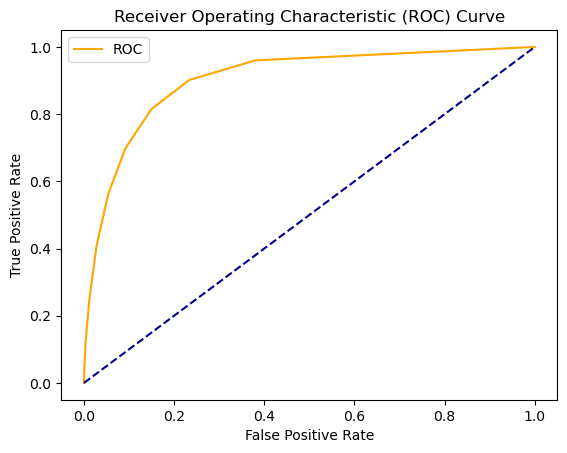

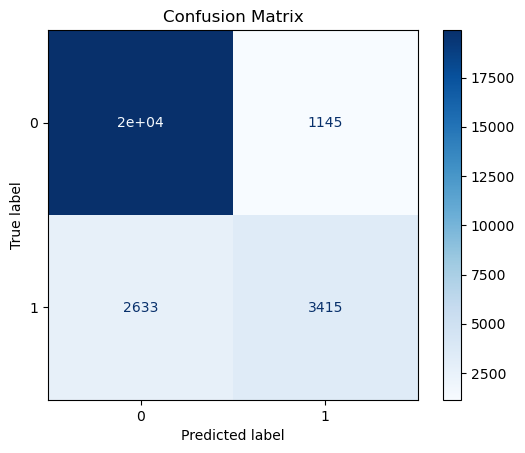

In [83]:
params_knn2 = {'n_neighbors': 9,'metric': 'manhattan'}

model_knn2 = KNeighborsClassifier(**params_knn2)
model_knn2, accuracy_knn2, roc_auc_knn2, coh_kap_knn2, tt_knn2 = run_model(model_knn2, 
                                                                columnsWithoutList(X_train,col_set_dummies), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_dummies), 
                                                                y_test)
model_name_2.append('KNN')
accuracy_scores_2.append(accuracy_knn2)
roc_auc_scores_2.append(roc_auc_knn2)
coh_kap_scores_2.append(coh_kap_knn2)
tt_2.append(tt_knn2)

## Model-3: Decision Tree

In [84]:
model_dt2 = DecisionTreeClassifier()

param_grid_dt2 = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
}

grid_serach_dt2 = GridSearchCV(estimator=model_dt2, 
                                 param_grid=param_grid_dt2, 
                                 cv=tscv, 
                                 scoring='accuracy', 
                                 )
grid_serach_dt2.fit(X_train, y_train)
best_params_dt2 = grid_serach_dt2.best_params_
print("Best parameters for Decision Tree: ", best_params_dt2)

Best parameters for Decision Tree:  {'criterion': 'log_loss', 'max_depth': 10}


Accuracy = 0.9236503191999704
ROC Area under Curve = 0.8737310084239862
Cohen's Kappa = 0.7724485205129888
Time taken = 1.6582953929901123
              precision    recall  f1-score   support

         0.0    0.93940   0.96390   0.95149     21051
         1.0    0.86179   0.78356   0.82082      6048

    accuracy                        0.92365     27099
   macro avg    0.90060   0.87373   0.88615     27099
weighted avg    0.92208   0.92365   0.92233     27099



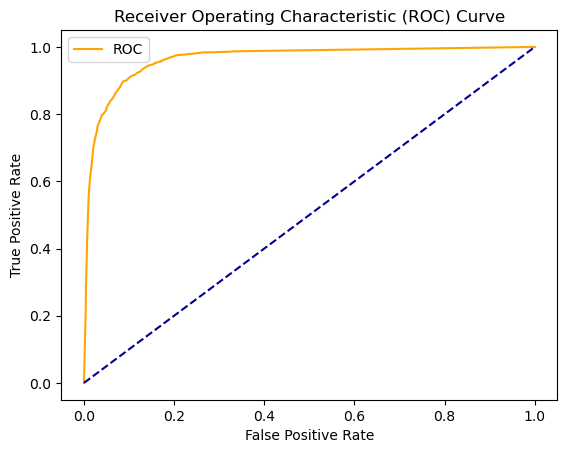

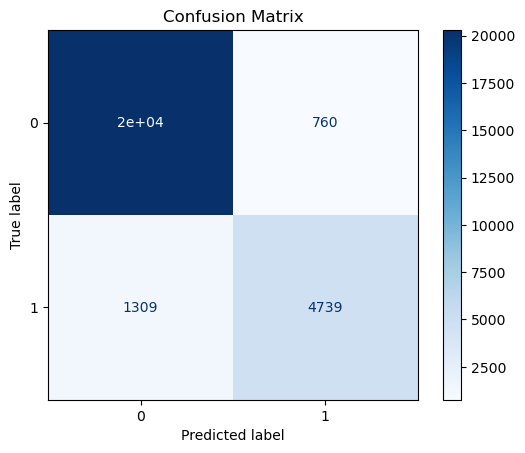

                     Feature  Importance
4              ('Sunshine',)    0.505662
9           ('Humidity3pm',)    0.138937
3           ('Evaporation',)    0.085090
11          ('Pressure3pm',)    0.044330
13             ('Cloud3pm',)    0.040425
..                       ...         ...
90       ('WindDir9am_ESE',)    0.000000
91         ('WindDir9am_N',)    0.000000
92        ('WindDir9am_NE',)    0.000000
49   ('Location_NorahHead',)    0.000000
119      ('WindDir3pm_WSW',)    0.000000

[120 rows x 2 columns]


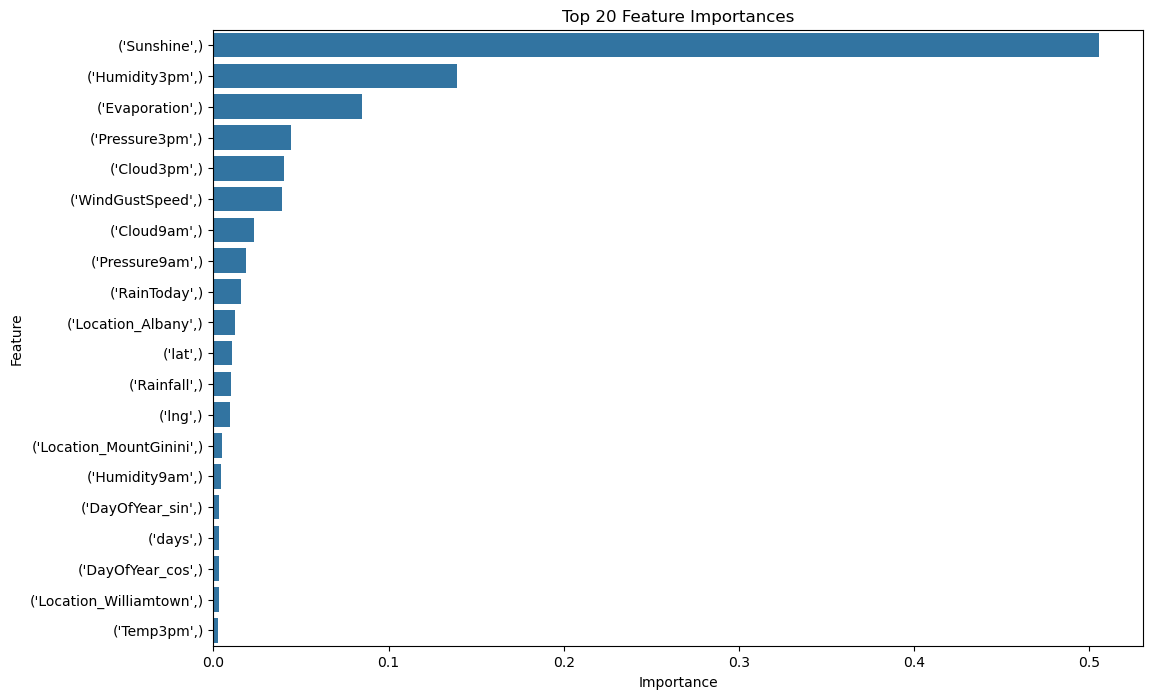

In [85]:
params_dt2 = {
    'criterion': 'log_loss',
    'max_depth': 10}

model_dt2 = DecisionTreeClassifier(**params_dt2)
model_dt2, accuracy_dt2, roc_auc_dt2, coh_kap_dt2, tt_dt2 = run_model(model_dt2, 
                                                                columnsWithoutList(X_train,col_set_dummies), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_dummies), 
                                                                y_test)
model_name_2.append('Decision Tree')
accuracy_scores_2.append(accuracy_dt2)
roc_auc_scores_2.append(roc_auc_dt2)
coh_kap_scores_2.append(coh_kap_dt2)
tt_2.append(tt_dt2)

## Model-4: Random Forest

In [86]:
model_rf2 = RandomForestClassifier()

param_grid_rf2 = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
}

grid_serach_rf2 = GridSearchCV(estimator=model_rf2, 
                                 param_grid=param_grid_rf2, 
                                 cv=tscv, 
                                 scoring='accuracy', 
                                 )
grid_serach_rf2.fit(X_train, y_train)
best_params_rf2 = grid_serach_rf2.best_params_
print("Best parameters for Random Forest: ", best_params_rf2)

Best parameters for Random Forest:  {'criterion': 'log_loss', 'max_depth': None}


Accuracy = 0.9342411159083361
ROC Area under Curve = 0.8841419138554666
Cohen's Kappa = 0.8020241524835562
Time taken = 22.886294841766357
              precision    recall  f1-score   support

         0.0    0.94266   0.97463   0.95838     21051
         1.0    0.89989   0.79365   0.84344      6048

    accuracy                        0.93424     27099
   macro avg    0.92127   0.88414   0.90091     27099
weighted avg    0.93311   0.93424   0.93273     27099



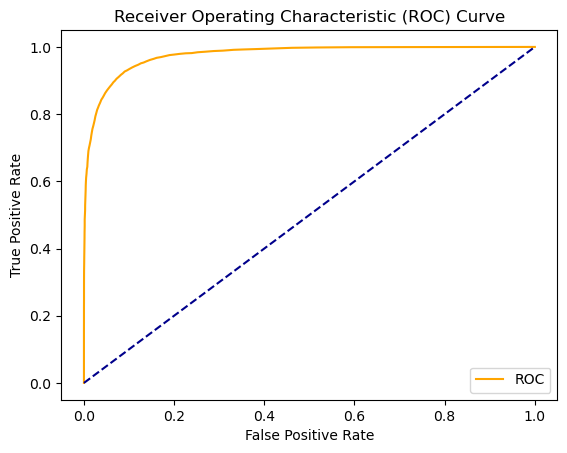

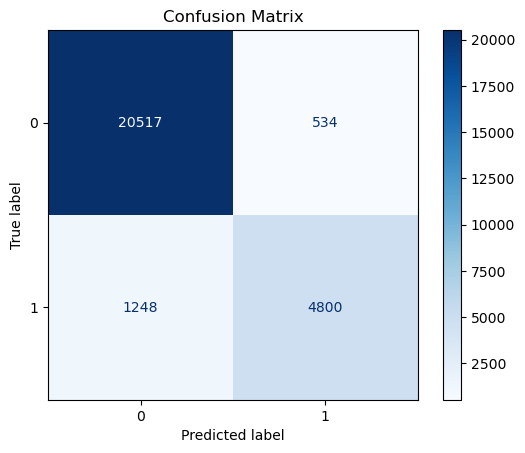

                        Feature  Importance
4                 ('Sunshine',)    0.150805
13                ('Cloud3pm',)    0.080218
9              ('Humidity3pm',)    0.078068
12                ('Cloud9am',)    0.075876
3              ('Evaporation',)    0.053537
..                          ...         ...
27  ('Location_BadgerysCreek',)    0.000553
36         ('Location_Darwin',)    0.000495
39      ('Location_Katherine',)    0.000249
48           ('Location_Nhil',)    0.000170
64          ('Location_Uluru',)    0.000149

[120 rows x 2 columns]


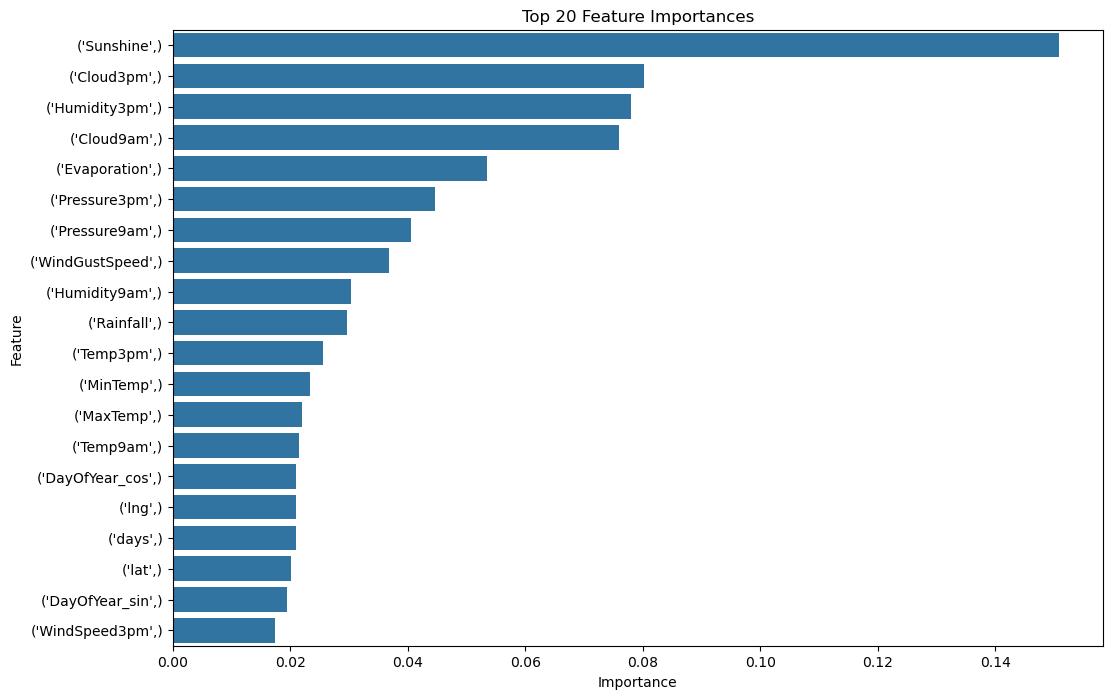

In [87]:
params_rf2 = {'max_depth': None,
             'criterion': 'log_loss'}

model_rf2 = RandomForestClassifier(**params_rf2)
model_rf2, accuracy_rf2, roc_auc_rf2, coh_kap_rf2, tt_rf2 = run_model(model_rf2,
                                                                columnsWithoutList(X_train,col_set_dummies), 
                                                                y_train,  
                                                                columnsWithoutList(X_test,col_set_dummies), 
                                                                y_test)
model_name_2.append('Random Forest')
accuracy_scores_2.append(accuracy_rf2)
roc_auc_scores_2.append(roc_auc_rf2)
coh_kap_scores_2.append(coh_kap_rf2)
tt_2.append(tt_rf2)

## Model Comparison

C:\Users\leung\AppData\Local\Temp\ipykernel_10496\3196046526.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data_scores_2, palette='summer')


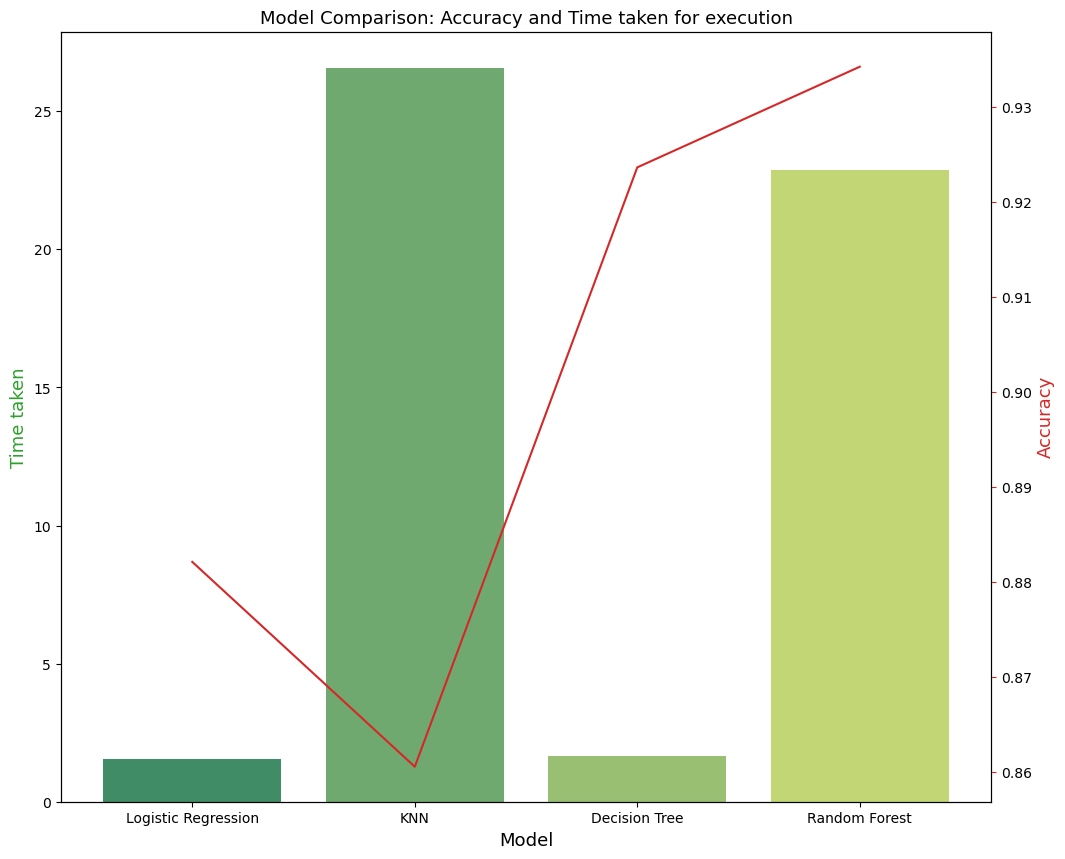

In [88]:
model_data_2 = {'Model': model_name_2,
              'Accuracy': accuracy_scores_2,
              'ROC_AUC': roc_auc_scores_2,
              'Cohen_Kappa': coh_kap_scores_2,
              'Time taken': tt_2}
data_scores_2 = pd.DataFrame(model_data_2)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data_scores_2, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data_scores_2, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

C:\Users\leung\AppData\Local\Temp\ipykernel_10496\1430633833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data_scores_2, palette='winter')


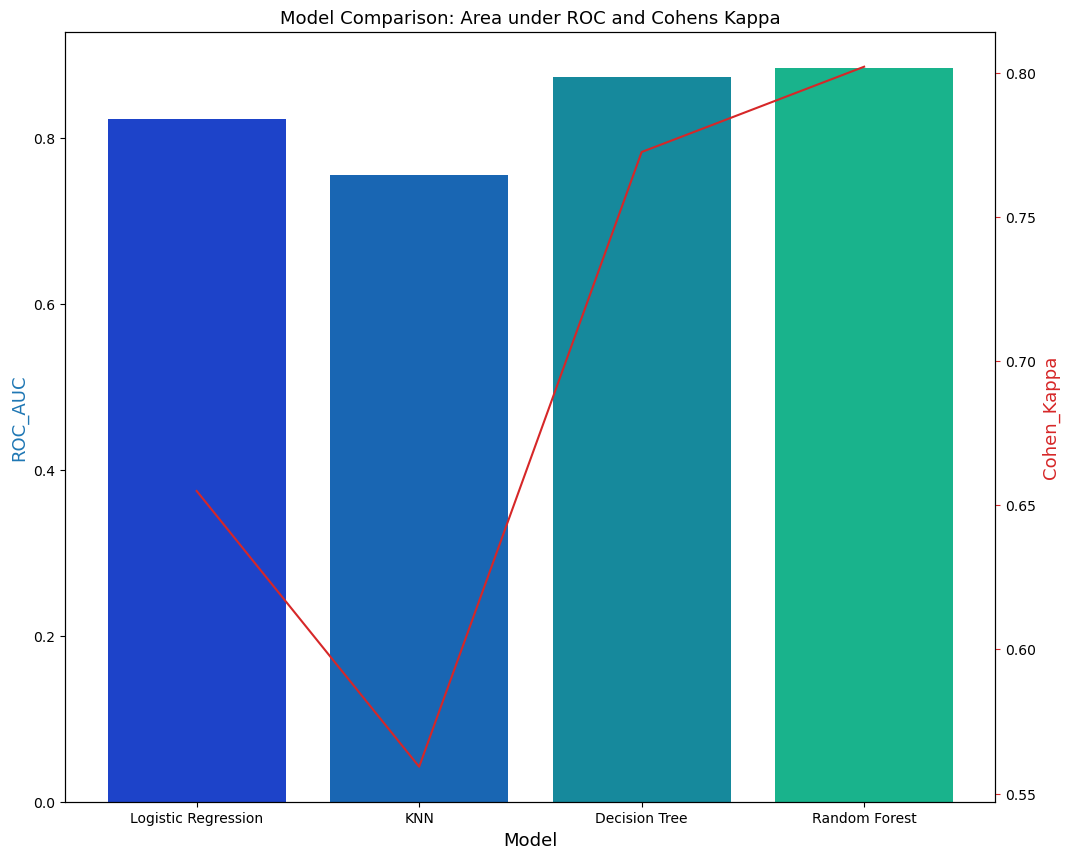

In [89]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data_scores_2, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data_scores_2, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [90]:
data_scores_2

,Model,Accuracy,ROC_AUC,Cohen_Kappa,Time taken
0,Logistic Regression,0.882136,0.822558,0.654918,1.556665
1,KNN,0.860585,0.755129,0.559293,26.553880
2,Decision Tree,0.923650,0.873731,0.772449,1.658295
3,Random Forest,0.934241,0.884142,0.802024,22.886295


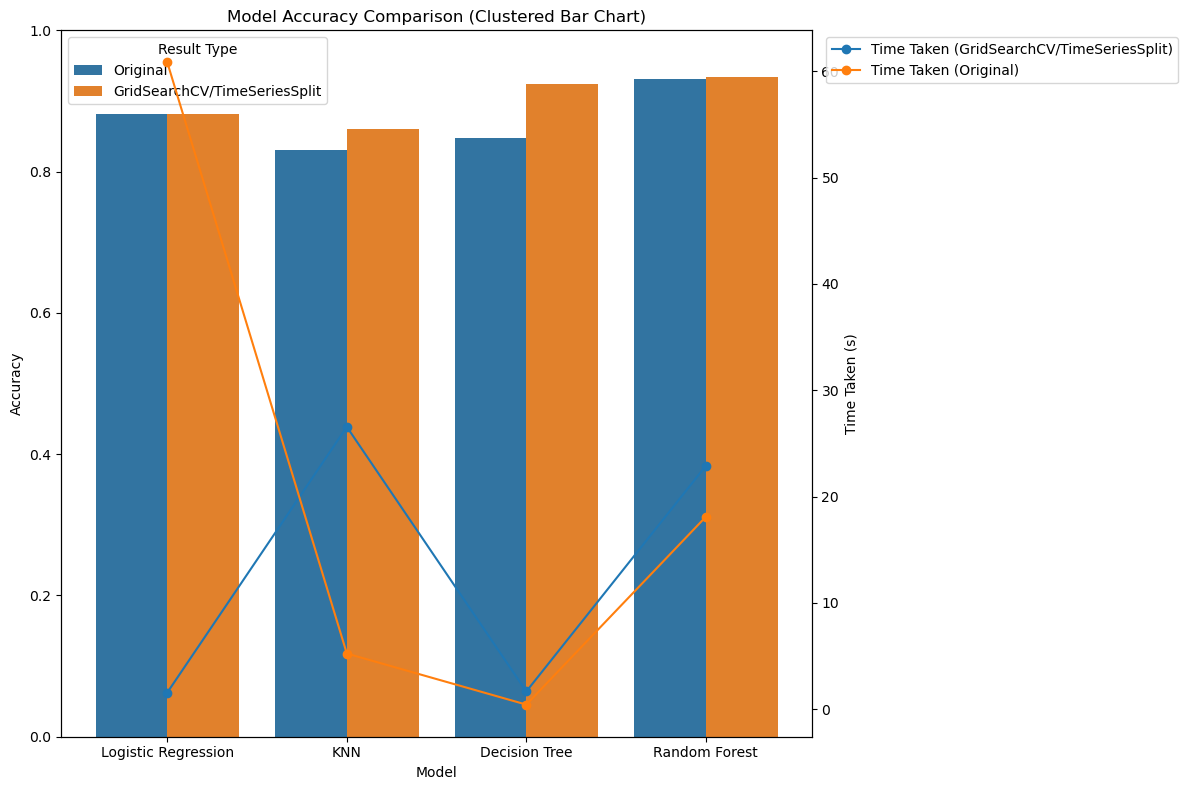

In [102]:
data_scores
data_scores_2
# Clustered bar chart comparing model accuracies from both data_scores and data_scores_2

# Merge the two DataFrames for plotting
df1 = data_scores[['Model', 'Accuracy', 'Time taken']].copy()
df1['Type'] = 'Original'
df2 = data_scores_2[['Model', 'Accuracy', 'Time taken']].copy()
df2['Type'] = 'GridSearchCV/TimeSeriesSplit'
df_all = pd.concat([df1, df2], ignore_index=True)

plt.figure(figsize=(12, 8))
bar = sns.barplot(x='Model', y='Accuracy', hue='Type', data=df_all)
plt.title('Model Accuracy Comparison (Clustered Bar Chart)')
plt.ylim(0, 1)
plt.legend(title='Result Type')
plt.ylabel('Accuracy')

# Add stacked line chart for Time taken
ax2 = plt.twinx()
for t, group in df_all.groupby('Type'):
    ax2.plot(group['Model'], group['Time taken'], marker='o', label=f'Time Taken ({t})')
ax2.set_ylabel('Time Taken (s)')
ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

plt.tight_layout()
plt.show()


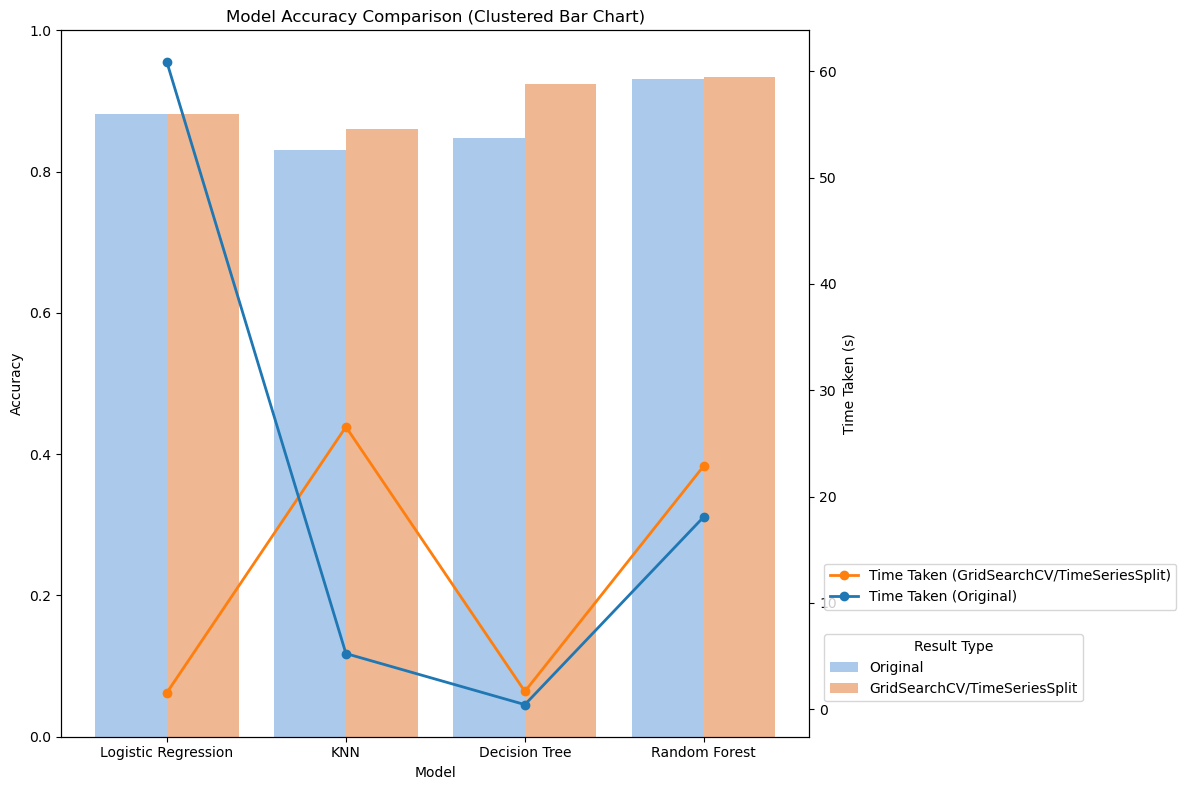

In [ ]:
data_scores
data_scores_2
# Clustered bar chart comparing model accuracies from both data_scores and data_scores_2

# Merge the two DataFrames for plotting
df1 = data_scores[['Model', 'Accuracy', 'Time taken']].copy()
df1['Type'] = 'Original'
df2 = data_scores_2[['Model', 'Accuracy', 'Time taken']].copy()
df2['Type'] = 'GridSearchCV/TimeSeriesSplit'
df_all = pd.concat([df1, df2], ignore_index=True)

plt.figure(figsize=(12, 8))
# Use different color palettes for bar and line charts for clear differentiation
bar_palette = 'pastel'  # Bar chart palette
line_colors = {'Original': '#1f77b4', 'GridSearchCV/TimeSeriesSplit': '#ff7f0e'}  # Line chart colors

bar = sns.barplot(x='Model', y='Accuracy', hue='Type', data=df_all, palette=bar_palette)
plt.title('Model Accuracy Comparison (Clustered Bar Chart)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Move bar legend outside (right bottom)
plt.legend(title='Result Type', loc='lower left', bbox_to_anchor=(1.02, 0.05), borderaxespad=0)

# Add line chart for Time taken with distinct colors
ax2 = plt.twinx()
for t, group in df_all.groupby('Type'):
    ax2.plot(group['Model'], group['Time taken'], marker='o', label=f'Time Taken ({t})', color=line_colors[t], linewidth=2)
ax2.set_ylabel('Time Taken (s)')
# Move line legend outside (right bottom)
ax2.legend(loc='lower left', bbox_to_anchor=(1.02, 0.18), borderaxespad=0)

plt.tight_layout()
plt.show()